In [2]:
import file_load
import preprocess

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 10, 'font.family': 'AppleGothic'}) # 폰트 설정
plt.rc('font', family='AppleGothic')

In [3]:
df = file_load.load_merged_current_version()

In [4]:
df['is_test'].value_counts()

is_test
0    1118822
1       9272
Name: count, dtype: int64

In [5]:
preprocess.아파트_unique_key_add(df)

In [6]:
apts = df.drop_duplicates(subset=['아파트_unique_key'])[['아파트_unique_key', '아파트명', '좌표X', '좌표Y', '평수']]

In [7]:
apts.head()

,아파트_unique_key,아파트명,좌표X,좌표Y,평수
0,강남구_개포동_658-1_개포6차우성_1987,개포6차우성,127.057210,37.476763,24
12,강남구_개포동_652_개포우성3차_1984,개포우성3차,127.055990,37.483894,40
25,강남구_개포동_12-2_개포자이_2004,개포자이,127.076624,37.496296,46
38,강남구_개포동_141_개포주공1단지_1982,개포주공1단지,127.058521,37.480002,12
204,강남구_개포동_187_개포주공5단지_1983,개포주공5단지,127.068028,37.487802,22


In [8]:
apts.columns

Index(['아파트_unique_key', '아파트명', '좌표X', '좌표Y', '평수'], dtype='object')

In [9]:
apts.isnull().sum()

아파트_unique_key    0
아파트명              0
좌표X               0
좌표Y               0
평수                0
dtype: int64

In [10]:
coordinates = apts[["좌표X", "좌표Y",'평수']]

In [11]:
coordinates

,좌표X,좌표Y,평수
0,127.057210,37.476763,24
12,127.055990,37.483894,40
25,127.076624,37.496296,46
38,127.058521,37.480002,12
204,127.068028,37.487802,22
...,...,...,...
4738,126.935946,37.544875,14
5901,127.013520,37.517163,18
6087,127.063427,37.548716,25
8880,126.996600,37.564541,8


In [12]:
# 클러스터링에 사용할 좌표만 추출

# K-Means 모델 생성 및 학습 (클러스터 수는 3으로 설정)
kmeans = KMeans(n_clusters=30, random_state=42)
apts['클러스터'] = kmeans.fit_predict(coordinates)

/Users/slowin/miniconda3/envs/house-test3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [13]:
apts.shape

(9032, 6)

In [14]:
apts.columns

Index(['아파트_unique_key', '아파트명', '좌표X', '좌표Y', '평수', '클러스터'], dtype='object')

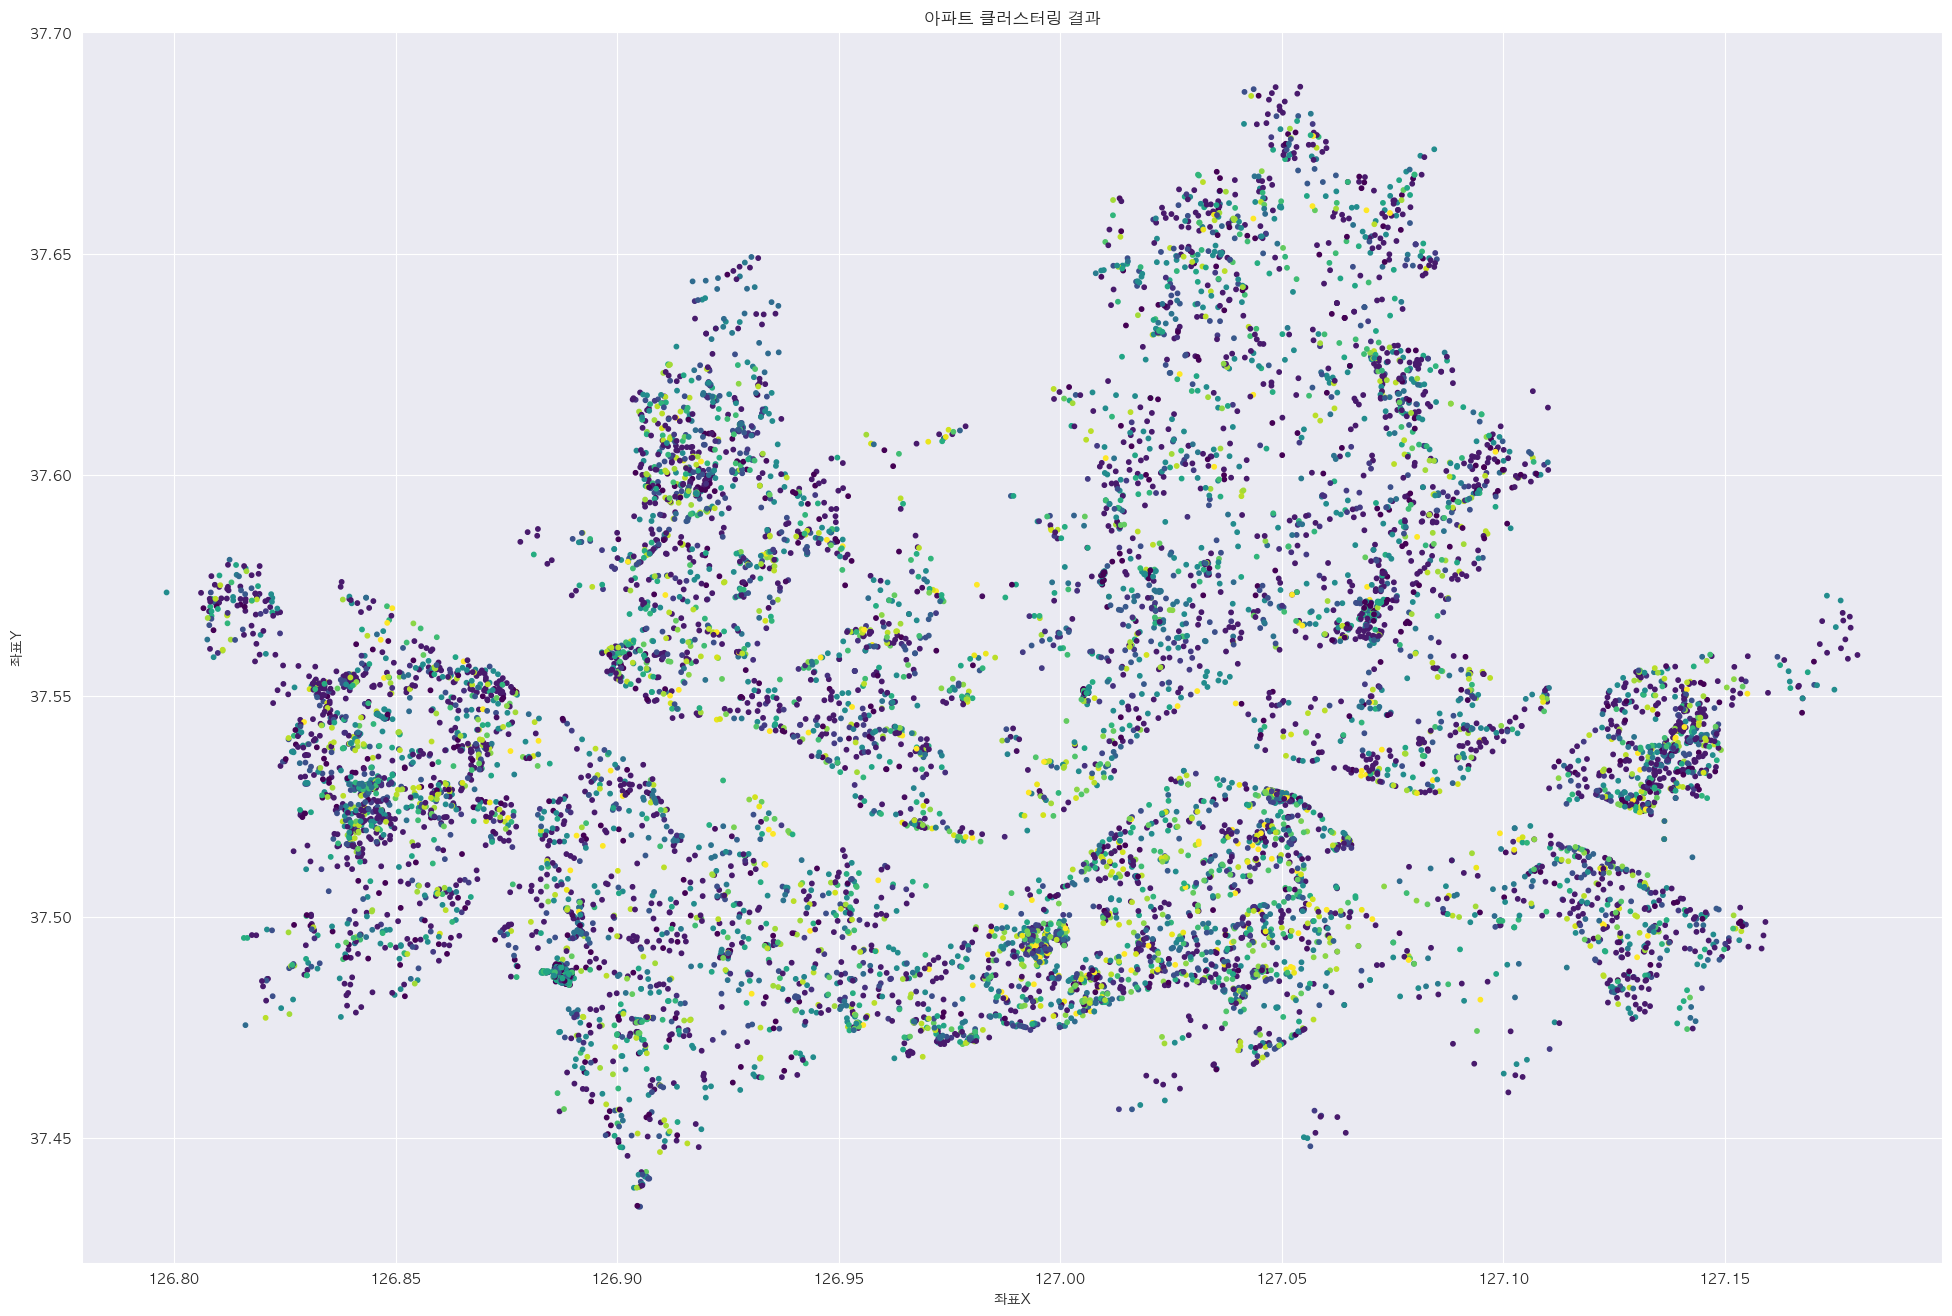

In [15]:
# 클러스터 결과 시각화
plt.figure(figsize=(24, 16))  # 가로 12인치, 세로 8인치

plt.scatter(apts['좌표X'], apts['좌표Y'], c=apts['클러스터'], cmap='viridis', s=10)
plt.xlabel('좌표X')
plt.ylabel('좌표Y')
plt.title('아파트 클러스터링 결과')
plt.show()

In [16]:
apts.to_csv('../data/아파트단지_정보_30.csv', index=False)

In [17]:
a

NameError: name 'a' is not defined

In [337]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 클러스터 수별 WCSS 저장
wcss = []
for i in range(25, 100):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(coordinates)
    wcss.append(kmeans.inertia_)


/Users/slowin/miniconda3/envs/house-test3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/slowin/miniconda3/envs/house-test3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/slowin/miniconda3/envs/house-test3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/slowin/miniconda3/envs/house-test3.8/lib/python3.8/site-packages/sklearn/cluster/

KeyboardInterrupt: 

In [57]:
wcss

[207906790114.20282,
 190944008295.60693,
 175855775517.02094,
 162533015038.55066,
 152226070856.35913,
 138665868483.938,
 126740291506.42055,
 121625418185.32425,
 113446697873.83688,
 104320112237.4487,
 96060680736.54381,
 95195780277.89067,
 88437902735.9307,
 83086071160.91022,
 78898306493.22339,
 74404336760.54459,
 69727017154.43369,
 65002345404.97123,
 60435088715.46533,
 56879942451.71504,
 54636573154.33972,
 52603323161.316284,
 48681791402.24779,
 47381188491.25778,
 45162952673.303345,
 42557701614.09154,
 40600292946.424385,
 39697556556.910736,
 37297079075.02311,
 35933169664.24904,
 34914648972.740074,
 32746501735.887962,
 32223945209.91932,
 30825853476.24985,
 29916450013.601486,
 29403988636.06679,
 28091770840.53351,
 27362623689.145668,
 26043007949.033607,
 24880080336.974743,
 23534838806.894955,
 23310276322.026356,
 22822398222.88965,
 21820095407.161194,
 20712272760.659332,
 20070509307.17658,
 19461452524.83631,
 18763150061.078278,
 18208267293.258675

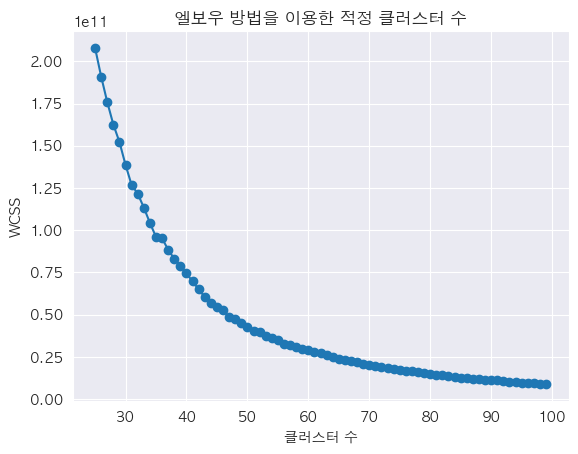

In [65]:
# WCSS 시각화
plt.plot(range(25, 100), wcss, marker='o')
plt.xlabel('클러스터 수')
plt.ylabel('WCSS')
plt.title('엘보우 방법을 이용한 적정 클러스터 수')
plt.show()

In [59]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(25, 100):
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(coordinates)
    silhouette_scores.append(silhouette_score(coordinates, labels))



/Users/slowin/miniconda3/envs/house-test3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/slowin/miniconda3/envs/house-test3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/slowin/miniconda3/envs/house-test3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/slowin/miniconda3/envs/house-test3.8/lib/python3.8/site-packages/sklearn/cluster/

In [18]:
silhouette_scores

[0.4273696274312631,
 0.43825777996219034,
 0.4364804397496099,
 0.4375151600955133,
 0.4377162977425232,
 0.4382932063370458,
 0.43249098612849485,
 0.43968925094977573,
 0.4289393501616297,
 0.4181515115941686,
 0.4232303863977626,
 0.41592542536006644,
 0.4180361233172121,
 0.4187606227007324,
 0.41976860642152175,
 0.4143376860427568,
 0.4185097364482552,
 0.418186044954673,
 0.4274329194991799,
 0.42092593453763566,
 0.4094436828284486,
 0.4161500320728942,
 0.41953008677513265,
 0.4183648792742238,
 0.41768227533518376,
 0.42108271511846684,
 0.4146168203752433,
 0.4191826124712742,
 0.4170264558961585,
 0.4208678398906694,
 0.4138470868669718,
 0.42123611987797827,
 0.41568956270724655,
 0.4109866292984831,
 0.41500511066743145,
 0.4193100779399516,
 0.4202330685253733,
 0.4168474061029848,
 0.42348173465665423,
 0.4209151931199229,
 0.41717679331321966,
 0.4126898334587569,
 0.4128214496329094,
 0.4160858558950135,
 0.4125580634999564,
 0.41392122816687216,
 0.41760414212588975

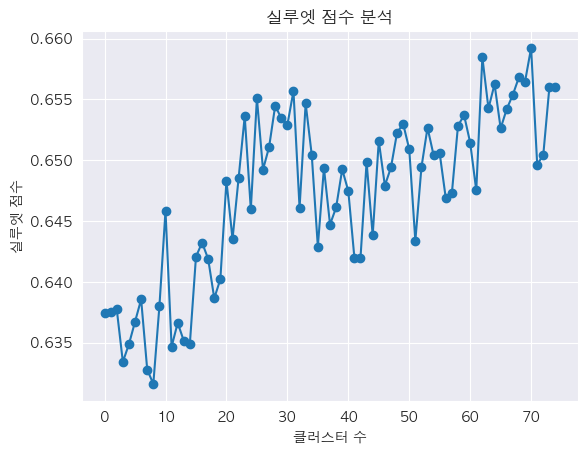

In [62]:
# x축 범위를 silhouette_scores에 맞게 조정
plt.plot(range(0, len(silhouette_scores)), silhouette_scores, marker='o')
plt.xlabel('클러스터 수')
plt.ylabel('실루엣 점수')
plt.title('실루엣 점수 분석')
plt.show()

In [12]:
df.head()

,index,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,...,한강거리,지가지수,아파트전세_전기대비증감률,실업률,민간소비,소비자심리지수,경제심리지수,여수신 금리차,is_test,아파트_unique_key
0,0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,...,5018.819105,74.497,0.6,3.3,0.6,112.1,102.3,1.81,0,강남구_개포동_658-1_개포6차우성_1987
1,1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,...,5018.819105,74.497,0.6,3.3,0.6,112.1,102.3,1.81,0,강남구_개포동_658-1_개포6차우성_1987
2,2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,...,5018.819105,74.497,0.6,3.3,0.6,112.1,102.3,1.81,0,강남구_개포동_658-1_개포6차우성_1987
3,3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,...,5018.819105,74.497,0.6,3.3,0.6,112.1,102.3,1.81,0,강남구_개포동_658-1_개포6차우성_1987
4,4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,...,5018.819105,74.497,0.6,3.3,0.6,112.1,102.3,1.81,0,강남구_개포동_658-1_개포6차우성_1987


In [13]:
# result.to_csv('../data/아파트_unique_key_마지막_계약년월.csv', index=False)
